### Written by Federica B. Bianco @fedhere
### edited by Marium A. Sultan @MariumS
### NYU CUSP PUI
### Assignment 1 Homework 3
- ### GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
### _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
- ### For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
- ### Describe the behavior you see in the plots in terms of the law of large numbers.
- ### PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
### Extra Credit: FIT a gaussian to the distribution of means            

In [1]:
from __future__ import print_function
__author__= 'mas1300'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## choose which distributions to use 

In [2]:
distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
#distributions = ['chisq']


## and which mean/SDV to give it

In [3]:
mymean = 100
SDV=48

In [4]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

In [5]:

md = {}
# md is an empty disctionary
#md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
#pl.hist(md['chisq'], bins = 30)
#pl.ylabel('N')
#pl.xlabel('x')

### Figure 1: Chi sq distribution: df = 100, N=100

## let numpy calculate what the mean and stdev of this distribution are

In [6]:
#print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000)

In [7]:
#mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
np.random.seed(4)
mysize = (np.random.rand(100) * 2000).astype(int)
print (mysize, mysize.shape)

[1934 1094 1945 1429 1395  432 1952   12  505  869 1558  395 1725 1966  327
 1194   17  773   88 1913  872 1897 1572 1732  346  149 1201  335 1466  816
 1055 1875 1043  216  316 1090 1048 1275  802 1299  793 1247 1534  357  751
 1005 1373  507 1109 1249 1791  725 1275  382  995  364 1836  863 1660  833
 1809  809  662 1144 1690 1722 1191  169 1194  490 1465 1789 1029 1207  130
 1080  258 1229  727 1535   97  219 1368 1029 1143 1687  975 1620 1020 1853
 1333  297  729 1731  700  378  945  785 1237  873] (100,)


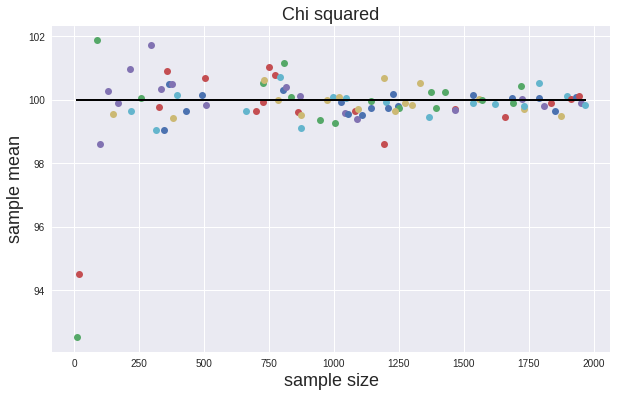

In [8]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: [describe what you see and how it relates to the law of large numbers]

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

In [9]:
#allmeans = list(md['chisq']['means'].values())

#pl.figure(figsize=(10, 10))
#pl.hist(allmeans,bins=30)
#pl.xlabel('sample mean', fontsize = 18)
#pl.ylabel('N', fontsize = 18)

## Figure 3: [...]

# Do it for the Normal distribution


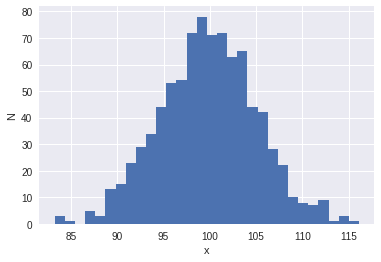

In [20]:
numpy.random.normal(loc=0.0, scale=1.0, size=None)

distributions = ['normal']

# md is an empty disctionary
md['normal'] = np.random.normal(loc = mymean, scale= 5,  size = n )
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['normal'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [21]:
print ("normal mean: %.2f, standard deviation: %.2f"%(md['normal'].mean(), md['normal'].std()))

normal mean: 99.77, standard deviation: 5.24


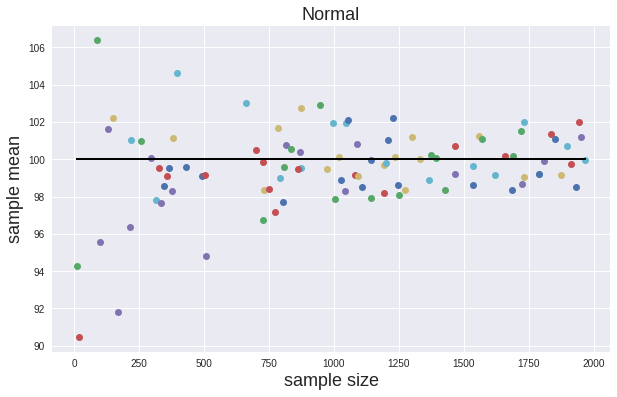

In [22]:
md['normal'] = {} 


for n in mysize:
    md['normal'][n] = np.random.normal(loc = mymean, scale=SDV,  size = n )
    

md['normal']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()
        #and plot it
        axnormal_mu_n.plot(nn, md['normal']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('Normal', fontsize=18)
        axnormal_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

In [23]:
# Do it for the Poisson distribution

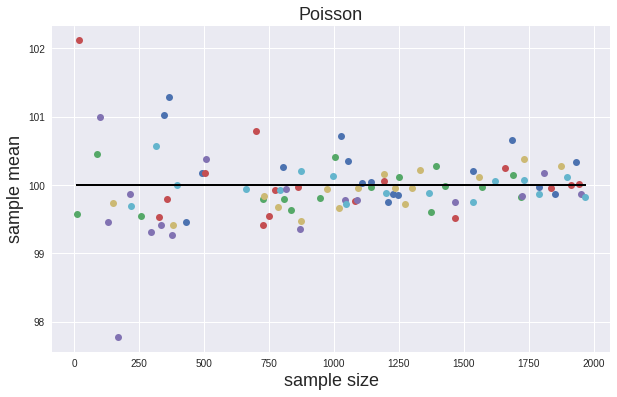

In [24]:
#poisson([lam, size])	Draw samples from a Poisson distribution.

md['poisson'] = {} 


for n in mysize:
    md['poisson'][n] = np.random.poisson(lam = mymean, size = n )
    

md['poisson']['means'] = {}
axpoisson_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['poisson']:
    if not type(nn) == str:
        md['poisson']['means'][nn] = md['poisson'][nn].mean()
        #and plot it
        axpoisson_mu_n.plot(nn, md['poisson']['means'][nn], 'o')
        axpoisson_mu_n.set_xlabel('sample size', fontsize=18)
        axpoisson_mu_n.set_ylabel('sample mean', fontsize=18)
        axpoisson_mu_n.set_title('Poisson', fontsize=18)
        axpoisson_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

In [25]:
# Do it for the Binomial distribution

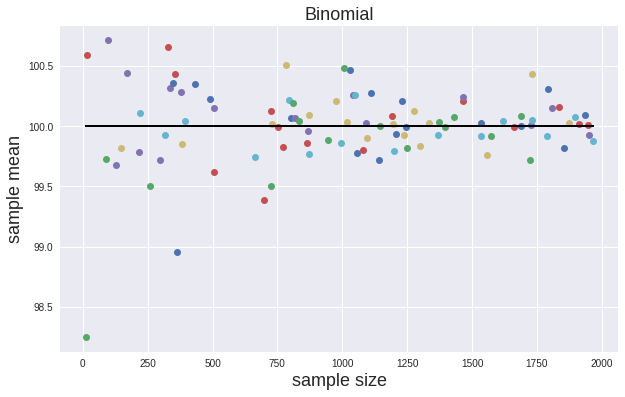

In [26]:
##your code here...
#binomial(n, p[, size])	Draw samples from a binomial distribution.

md['bino'] = {} 

e=200
p=.5

for n in mysize:
    md['bino'][n] = np.random.binomial(200, .5, size=n)
    

md['bino']['means'] = {}
axbino_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['bino']:
    if not type(nn) == str:
        md['bino']['means'][nn] = md['bino'][nn].mean()
        #and plot it
        axbino_mu_n.plot(nn, md['bino']['means'][nn], 'o')
        axbino_mu_n.set_xlabel('sample size', fontsize=18)
        axbino_mu_n.set_ylabel('sample mean', fontsize=18)
        axbino_mu_n.set_title('Binomial', fontsize=18)
        axbino_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

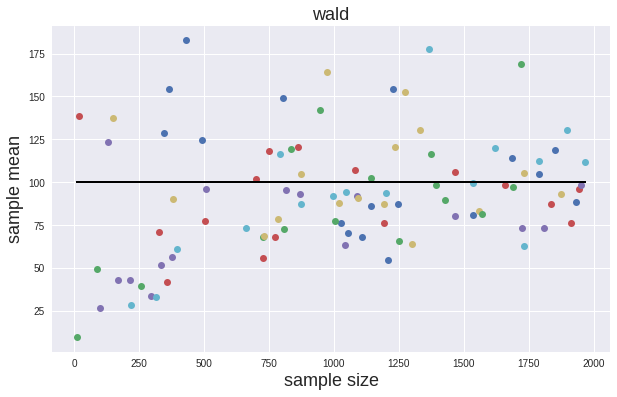

In [27]:
#numpy.random.wald(mean, scale, size=None)¶


md['wald'] = {} 


for n in mysize:
    md['wald'][n] = np.random.wald(mymean, scale=1, size=n)
    

md['wald']['means'] = {}
axwald_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['wald']:
    if not type(nn) == str:
        md['wald']['means'][nn] = md['wald'][nn].mean()
        #and plot it
        axwald_mu_n.plot(nn, md['wald']['means'][nn], 'o')
        axwald_mu_n.set_xlabel('sample size', fontsize=18)
        axwald_mu_n.set_ylabel('sample mean', fontsize=18)
        axwald_mu_n.set_title('wald', fontsize=18)
        axwald_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

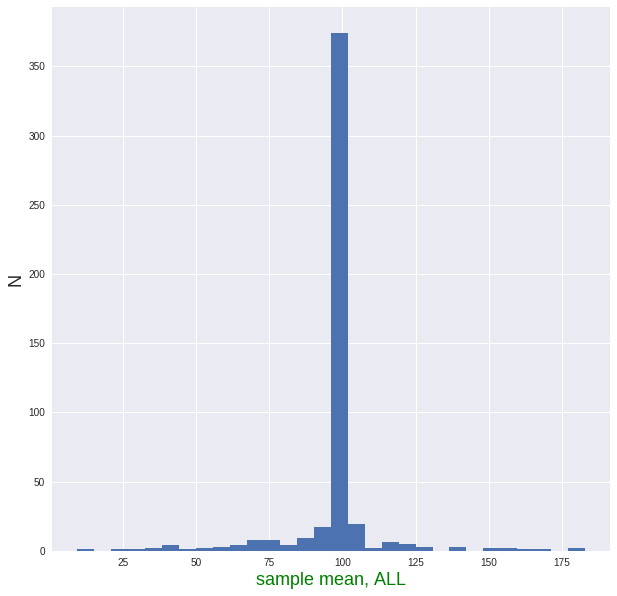

In [28]:
allmeans = list(md['normal']['means'].values()+
                md['poisson']['means'].values()+
                md['chisq']['means'].values()+
                md['bino']['means'].values()+
                md['wald']['means'].values())
                

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean, ALL', fontsize = 18, color='green')
pl.ylabel('N', fontsize = 18)

The larger the #, as we see from merging all these sample means, the more clusted the sample mean is to the true mean, which is 100

#http://www.investopedia.com/terms/c/central_limit_theorem.asp


#worked with/helped by(so I may not show up in their readme)
#Jack
#Rebecca
#Ruben 
#Dana